# Open Street Map
![osm](images/OSM.png)
What is open street map?
- https://www.openstreetmap.org/

OSMnx
- library documentation (https://osmnx.readthedocs.io)
- github (https://github.com/gboeing/osmnx)
- Examples and demos are available at: https://github.com/gboeing/osmnx-examples

Contextily
- https://github.com/geopandas/contextily

Lesson flow inspiration:
- https://youtu.be/QQmvq1cQHrk

## Download visualizing Open Street Map data

OSMnx lets you download data from Open Street Map.

You can download OSM data by providing OSMnx any of the following:
  - a bounding box
  - a lat-long point plus a distance
  - an address plus a distance
  - a place name or list of place names (to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries
  - a .osm formatted xml file


<div class="alert alert-info">
    
`osmnx` uses nominatim to geocode and find places. Make sure that the geography you search for is searchable here first:

https://nominatim.openstreetmap.org/ui/search.html

</div>

For the sake of clarity, and effective use of a workshop setting, let's use the "address plus a distance" method to download a street network dataset.

<div class="alert alert-danger">
    
Be careful! If your geography is too big (like Los Angeles, or Tokyo), it will take a loooooong time to donwload the data. Start small, think neighborhoods, like a zipcode, or Boyle Heights.

</div>

## Import the libraries

In [ ]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

## Define an area of interest

In [ ]:
address = 'Santa Monica, Los Angeles, CA'

In [ ]:
address = 'Koreatown, Los Angeles, California, USA'

In [ ]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square around Santa Monica
osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)

In [4]:
# how many rows and columns?
osm.shape

(4025, 58)

In [28]:
# what is the datatype?
type(osm)

geopandas.geodataframe.GeoDataFrame

In [5]:
# show me 10 random rows
osm.sample(10)

,unique_id,osmid,element_type,addr:state,amenity,building,ele,gnis:county_name,gnis:feature_id,gnis:import_uuid,...,addr:country,tourism,atm,level,drive_through,access,parking,emergency,ways,type
2942,way/440292237,440292237,way,NaN,NaN,yes,9.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3600,way/440792053,440792053,way,NaN,NaN,apartments,50.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2901,way/440292128,440292128,way,NaN,NaN,hotel,40.3,NaN,NaN,NaN,...,NaN,hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3951,relation/6550455,6550455,relation,NaN,NaN,apartments,53.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[440285567, 440285572]",multipolygon
2898,way/440292125,440292125,way,NaN,NaN,apartments,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,way/440285619,440285619,way,NaN,NaN,apartments,50.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1230,way/440286748,440286748,way,NaN,NaN,apartments,55.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1386,way/440287503,440287503,way,NaN,NaN,apartments,62.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,way/421478461,421478461,way,NaN,NaN,house,76.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,way/421477725,421477725,way,NaN,NaN,house,70.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Eliminate unnecessary columns
The dataframe has 85 columns. Let's explore what these are, and which ones are necessary for our use.

In [6]:
# Get a full list of columns
list(osm)

['unique_id',
 'osmid',
 'element_type',
 'addr:state',
 'amenity',
 'building',
 'ele',
 'gnis:county_name',
 'gnis:feature_id',
 'gnis:import_uuid',
 'gnis:reviewed',
 'name',
 'source',
 'geometry',
 'nodes',
 'height',
 'lacounty:ain',
 'lacounty:bld_id',
 'leisure',
 'addr:housenumber',
 'addr:postcode',
 'addr:street',
 'designation',
 'opening_hours',
 'shop',
 'start_date',
 'website',
 'building:units',
 'office',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'cuisine',
 'takeaway',
 'dispensing',
 'healthcare',
 'addr:city',
 'old_name',
 'phone',
 'smoking',
 'wheelchair',
 'building:levels',
 'building:levels:underground',
 'alt_name',
 'building:use',
 'denomination',
 'religion',
 'operator',
 'addr:country',
 'tourism',
 'atm',
 'level',
 'drive_through',
 'access',
 'parking',
 'emergency',
 'ways',
 'type']

What are the datatypes and count of null values?

In [7]:
osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4025 entries, 0 to 4024
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   unique_id                    4025 non-null   object  
 1   osmid                        4025 non-null   int64   
 2   element_type                 4025 non-null   object  
 3   addr:state                   15 non-null     object  
 4   amenity                      18 non-null     object  
 5   building                     4025 non-null   object  
 6   ele                          3992 non-null   object  
 7   gnis:county_name             4 non-null      object  
 8   gnis:feature_id              6 non-null      object  
 9   gnis:import_uuid             4 non-null      object  
 10  gnis:reviewed                4 non-null      object  
 11  name                         37 non-null     object  
 12  source                       7 non-null      object  


Really, what we really need is 

In [8]:
## subset it
columns_to_keep = ['geometry','building']
osm = osm[columns_to_keep]
osm.sample(10)

,geometry,building
575,"POLYGON ((-118.50469 34.03161, -118.50460 34.0...",house
2504,"POLYGON ((-118.49108 34.03257, -118.49099 34.0...",apartments
643,"POLYGON ((-118.50479 34.03169, -118.50475 34.0...",house
1360,"POLYGON ((-118.49285 34.02982, -118.49286 34.0...",house
1137,"POLYGON ((-118.49942 34.02845, -118.49943 34.0...",retail
3045,"POLYGON ((-118.49587 34.01620, -118.49575 34.0...",retail
718,"POLYGON ((-118.50555 34.02478, -118.50559 34.0...",house
3338,"POLYGON ((-118.48955 34.02838, -118.48965 34.0...",house
607,"POLYGON ((-118.50275 34.03173, -118.50282 34.0...",house
3153,"POLYGON ((-118.49019 34.02345, -118.49021 34.0...",house


## Count the unique buildings

In [9]:
osm_building_counts = osm.building.value_counts()
osm_building_counts

house           1684
apartments      1339
residential      327
retail           226
commercial       216
yes              158
industrial        20
school            19
hotel             18
warehouse          6
garage             4
hospital           4
kindergarten       3
college            1
Name: building, dtype: int64

In [10]:
type(osm_building_counts)

pandas.core.series.Series

## Create a dataframe
Let's create a dataframe for building types. Currently, value counts returns a series, which is a one-dimensional array, essentially, a single column in a table.

In [11]:
# convert it into a dataframe
df_osm_building_types = pd.DataFrame(osm_building_counts)
df_osm_building_types

,building
house,1684
apartments,1339
residential,327
retail,226
commercial,216
yes,158
industrial,20
school,19
hotel,18
warehouse,6


The dataframe created has the building type (in bold) as the index. Let's reset the index.

In [12]:
df_osm_building_types = df_osm_building_types.reset_index()
df_osm_building_types

,index,building
0,house,1684
1,apartments,1339
2,residential,327
3,retail,226
4,commercial,216
5,yes,158
6,industrial,20
7,school,19
8,hotel,18
9,warehouse,6


## Renaming columns

In [13]:
df_osm_building_types.columns = ['building_type','count']
df_osm_building_types

,building_type,count
0,house,1684
1,apartments,1339
2,residential,327
3,retail,226
4,commercial,216
5,yes,158
6,industrial,20
7,school,19
8,hotel,18
9,warehouse,6


## Create a horizontal bar chart

First, let's plot it and see what happens:

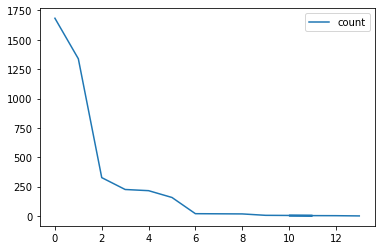

In [32]:
df_osm_building_types.plot()

What is it doing? What does it choose to plot by default?

Let's change this by specifying a horizontal bar graph `.barh` and adding arguments:

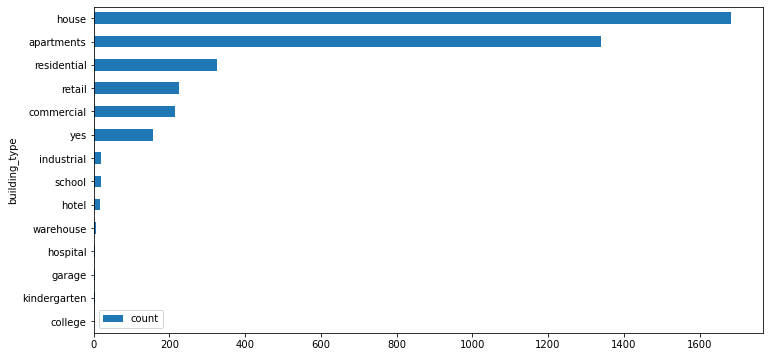

In [33]:
df_osm_building_types.plot.barh(figsize=(12,6),x='building_type')

oops! A horizontal bar reverses the order of the values on the y axis. Let's fix that.

## Sorting a dataframe

In [17]:
# sort it the other way
df_osm_building_types = df_osm_building_types.sort_values(by='count', ascending=True)
df_osm_building_types

,building_type,count
13,college,1
12,kindergarten,3
10,garage,4
11,hospital,4
9,warehouse,6
8,hotel,18
7,school,19
6,industrial,20
5,yes,158
4,commercial,216


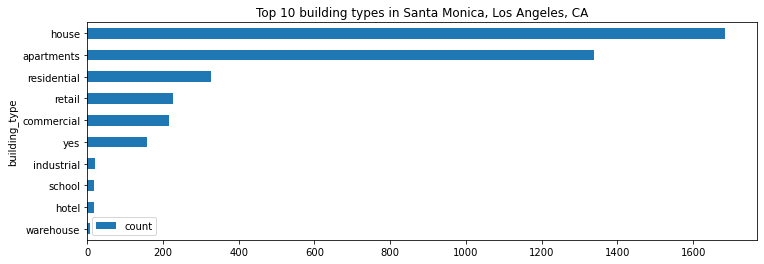

In [38]:
df_osm_building_types[-10:].plot.barh(figsize=(12,4),
                                      x='building_type',
                                      y='count',
                                      title="Top 10 building types in "+address)

## Geopandas Map Plots

Let's return to the original OSM data we downloaded. Remember that the OSMnx `geometries_from_address` command returned a geodataframe of buildings. Let's plot them:

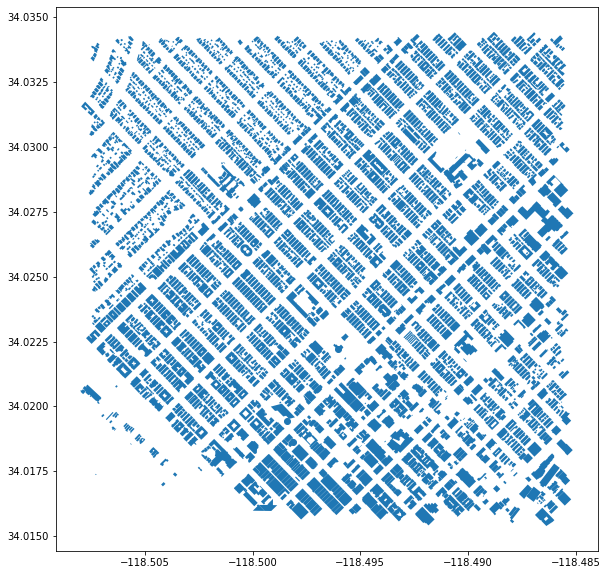

In [52]:
# plot entire dataset
osm.plot(figsize=(10,10))

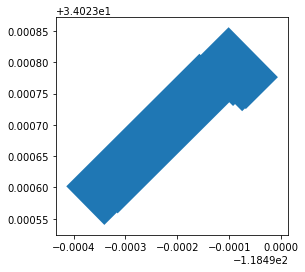

In [50]:
# plot a single random building
osm.sample(1).plot()

## Color coding buildings
Use the `column` argument to assign a column in the dataframe to color the polygons. If the column is numerical, it will poduce a numerically sequential map. If the column is categorical, it will produce a categorically colored map (a different color assigned to each distinct category).

You can use the `cmap` argument to assign a color palette. Find all the available options for `cmap` here:
- https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

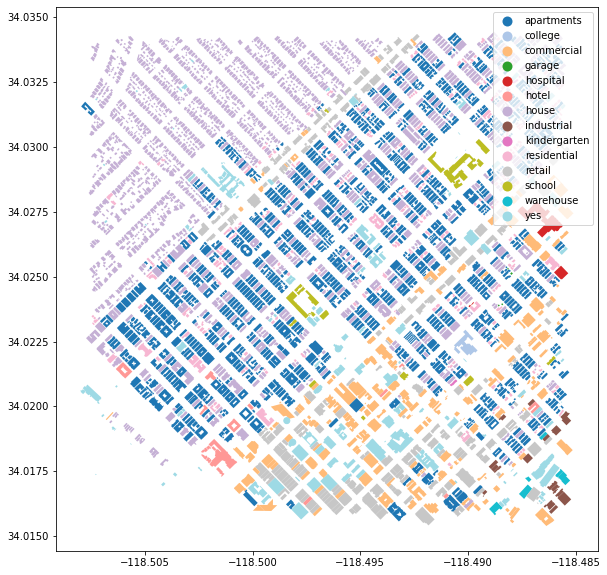

In [54]:
osm.plot(figsize=(10,10),column='building',cmap='tab20',legend=True)

## Add a basemap

In [59]:
# reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)

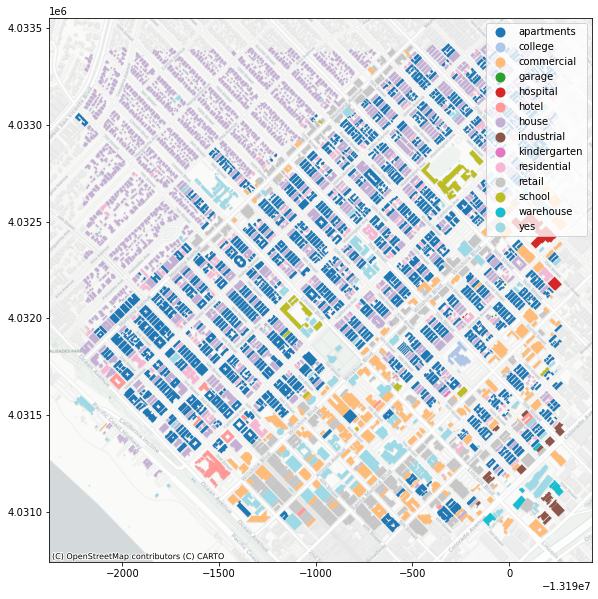

In [63]:
map = osm_web_mercator.plot(figsize=(10,10),column='building',cmap='tab20',legend=True)
# ctx.add_basemap(map,source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(map,source=ctx.providers.CartoDB.Positron)

In [ ]:
building_types = G.building.unique().tolist()

In [ ]:
G[G.building=='house']

In [ ]:
G_web_mercator = G.to_crs(epsg=3857)

In [ ]:
xlim = [G_web_mercator.total_bounds[0],G_web_mercator.total_bounds[2]]
xlim

In [ ]:
ylim = [G_web_mercator.total_bounds[1],G_web_mercator.total_bounds[3]]
ylim

In [ ]:
ax = G_web_mercator.plot(figsize=(10,10),cmap='prism',legend=True)
ax.set_xlim(G_web_mercator.total_bounds[0],G_web_mercator.total_bounds[2])
ax.set_ylim(G_web_mercator.total_bounds[1],G_web_mercator.total_bounds[3])
# ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)
# ctx.add_basemap(ax)


In [ ]:
def building_map(type):
    ax = G_web_mercator[G_web_mercator.building==type].plot(figsize=(10,10),column='building',legend=True,cmap='prism')
    ax.set_xlim(G_web_mercator.total_bounds[0],G_web_mercator.total_bounds[2])
    ax.set_ylim(G_web_mercator.total_bounds[1],G_web_mercator.total_bounds[3])
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)


In [ ]:
for value in building_types:
    building_map(value)

In [ ]:
G = ox.geocode_to_gdf(places)

In [ ]:
# network from address, including only nodes within 1km along the network from the address
%time G = ox.graph_from_address(address=address, dist=2000, dist_type='network', network_type='drive')

In [ ]:
# you can project the network to UTM (zone calculated automatically)
G = ox.project_graph(G)

In [ ]:
type(G)

## Plot it

In [ ]:
# plot it
fig, ax = ox.plot_graph(G, node_color='r')

Make it pretty

In [ ]:
# plot it with arguments
ax = ox.plot_graph(G,
             bgcolor='#fff',
             edge_color='#aaa',
             node_color='#888',
             node_size=10,
             figsize = (12,12) )

*Note* the plot above shows the network within 500m (traveling distance along the network) from the `location_point`. By default, the `network_type` parameter value is 'all', meaning that we do not filter out paths that restrict certain types of traffic. This also means that one-way streets are honored as one-way and you cannot travel the wrong direction down them. Thus, the 500m takes into account only those nodes you can reach within 500m while only traveling in the allowed direction of the street. Instead (below), we can specify `network_type='walk'` to build a street network only of paths that walking is allowed on. This also makes every path bi-directional in the directed network, because you can walk in either direction on the sidewalk of a one-way street. Thus, the 500m now takes into account those nodes you can reach within 500m while traveling in either direction (even if it's a one-way street).

<div class="alert alert-info">
    Try it yourself! Choose a city anywhere in the world, and display a map of its street network.
</div>

## Convert to geodataframes

In [ ]:
# convert this graph, networkx, to geodataframe
# it has two objects (layers), nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

## Nodes

Nodes are street intersections

In [ ]:
type(nodes)

In [ ]:
nodes.head()

In [ ]:
ax = nodes.plot(figsize=(20,12))

## Edges
Edges are street segments

In [ ]:
edges.head()

In [ ]:
ax = edges.plot(figsize=(20,12))

## Adding basemaps

In [ ]:
edges = edges
ax = edges.plot(figsize=(20,12),color='red')
ctx.add_basemap(ax)

In [ ]:
edges = edges.to_crs(epsg=3857)
ax = edges.plot(figsize=(20,12),color='red')
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

## Areas
Areas are place boundary polygons

In [ ]:
# get the place polygon
area = ox.geocode_to_gdf(address)

In [ ]:
area

In [ ]:
type(area)

In [ ]:
area.plot(figsize=(20,12))

## Search by map feature

* Full list of features from OSM (https://wiki.openstreetmap.org/wiki/Map_Features)

Examples calls to intake features from OSM:

```python
# for all buildings (could be a very large query)
features = ox.geometries_from_place(place, tags={'building': True})

# for specific buildings
features = ox.geometries_from_place(place, tags={'building': ['retail','industrial','commercial']})

# for amenities
features = ox.geometries_from_place(place, tags={'amenity': ['restaurant','fast_food']})

# for leisure spaces
features = ox.geometries_from_place(place, tags={'leisure': ['park']})
```

In [ ]:
%time features = ox.geometries_from_place('westwood, los angeles, ca',tags={'building': True})

In [ ]:
features.info()

In [ ]:
features.sample(3)

In [ ]:
features.building.value_counts()

In [ ]:
features.building.value_counts().plot.bar()

## Map it

In [ ]:
type(features)

In [ ]:
features = features.to_crs(epsg=3857)

In [ ]:
ax = features.plot(figsize=(15,15),column='building', legend=True,alpha=0.8)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

In [ ]:
# spice it up a bit
map = features.plot(figsize=(12,10),column='building',legend=True)
map.axis('off')
ctx.add_basemap(map,source=ctx.providers.Stamen.TonerLite)
import matplotlib.pyplot as plt
plt.ylim(4033000, 4034000)
plt.xlim(-13159000,-13156000)

## Points of interest

Points of interest
- https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.pois

List of tags, or "amenities"
- https://wiki.openstreetmap.org/wiki/Key:amenity

In [ ]:
# retrieve restaurants
restaurants = ox.geometries_from_place(place, tags = {'amenity': ['restaurant','fast_food']})
schools = ox.geometries_from_place(place, tags = {'amenity': ['school']})
parks = ox.geometries_from_place(place, tags = {'leisure': ['park']})


## Plotting all this data

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))

# plot the area polygon
area.plot(ax=ax, facecolor='gainsboro',alpha=0.7,linewidth=1.5,edgecolor='red')

# plot the street edges
# edges.plot(ax=ax, edgecolor='gray', linewidth=0.5, alpha=0.7)

# plot building footprints
# features.plot(ax=ax)

# plot restaurants
restaurants.plot(ax=ax,color='darkred',markersize=150)

# plot restaurants
parks.plot(ax=ax,color='green',alpha=0.7)

# plot schools
schools.plot(ax=ax,color='orange',markersize=50,legend=True)

ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite,crs=4326)